In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('datasets/50_startups.csv')

In [3]:
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [4]:
data.shape

(50, 5)

In [5]:
data.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [6]:
data.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [7]:
data.duplicated().sum()

0

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [9]:
data.corr()

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


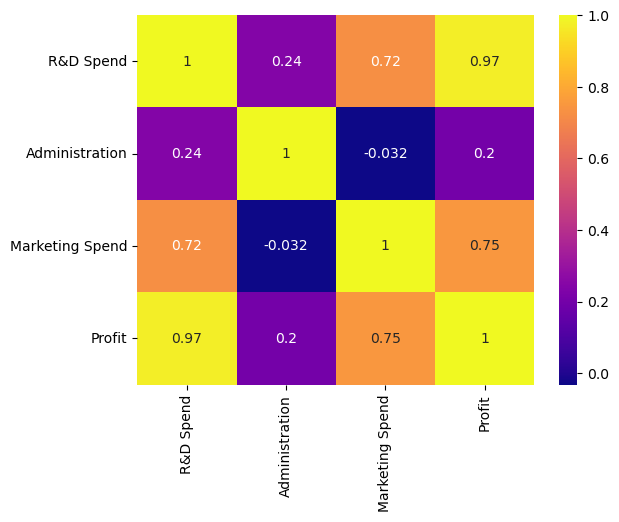

In [12]:
sns.heatmap(data.corr(),annot=True,cmap='plasma')
plt.show()

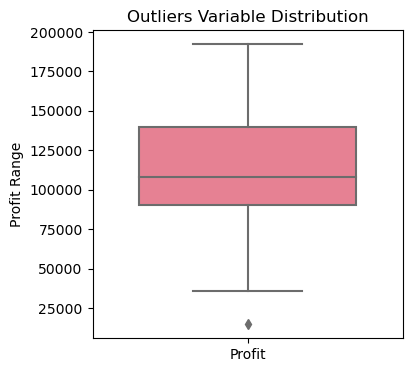

In [19]:
outliers = ['Profit']
plt.rcParams['figure.figsize'] = [4,4]
sns.boxplot(data = data[outliers] ,palette = 'husl' , width = 0.7)

plt.title('Outliers Variable Distribution')
plt.ylabel('Profit Range')

plt.show()

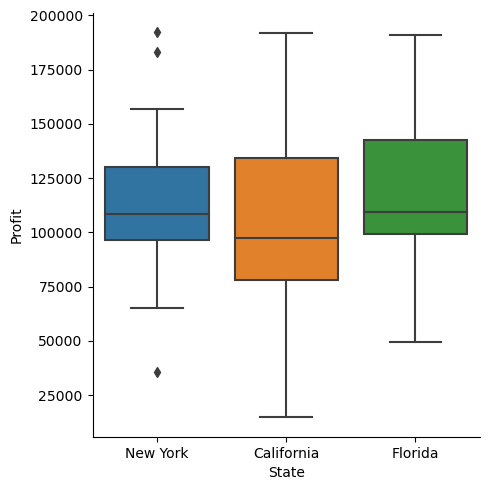

In [21]:
sns.catplot(x = 'State' , y = 'Profit' , data= data ,kind = 'box')
plt.show()

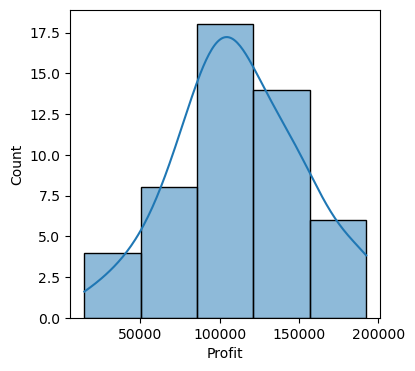

In [24]:
sns.histplot(data['Profit'] , bins = 5 ,kde = True)
plt.show()

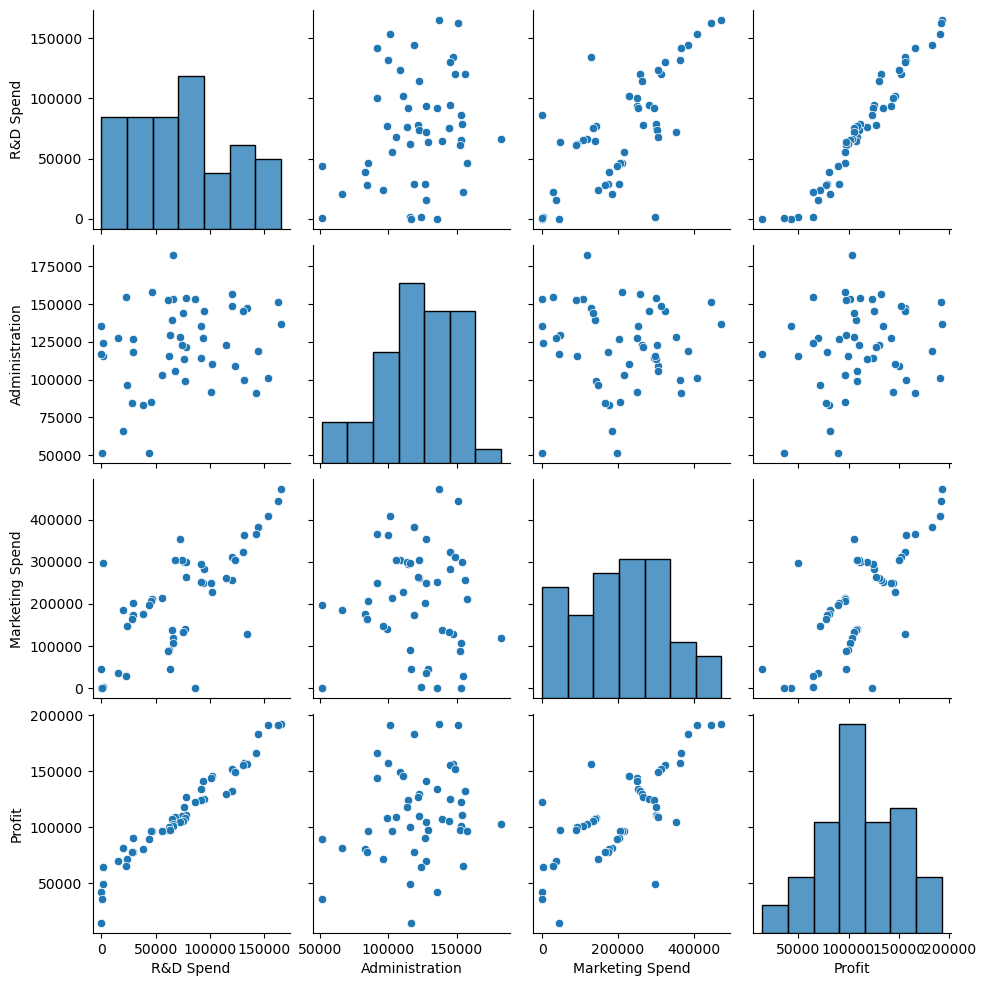

In [25]:
sns.pairplot(data)
plt.show()

In [26]:
x=data[['R&D Spend' , 'Administration' , 'Marketing Spend']]
y = data['Profit']

x = x.to_numpy()
y = y.to_numpy()
y = y.reshape(-1,1)

In [28]:
from sklearn.model_selection import train_test_split
xtrain , xtest , ytrain , ytest = train_test_split(x,y,test_size = 0.3 , random_state = 42)

In [31]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(xtrain,ytrain)
ypred = model.predict(xtest)
data = pd.DataFrame(data = {"predicted Profit": ypred.flatten()})
print(data.head())

   predicted Profit
0     125972.148263
1      85471.922710
2      98924.151683
3      46639.786287
4     128142.124732


In [32]:
testing_data_model_score = model.score(xtest , ytest)
print('model score/perofrmance on testing data' , testing_data_model_score)

training_data_model_score = model.score(xtrain, ytrain)
print('model score/perofrmance on training data' , training_data_model_score)


model score/perofrmance on testing data 0.9418819530700165
model score/perofrmance on training data 0.9508557563847194


In [33]:
df = pd.DataFrame(data = {'Predicted value':ypred.flatten(),'Actual Value':ytest.flatten()})
df

,Predicted value,Actual Value
0,125972.148263,134307.35
1,85471.922710,81005.76
2,98924.151683,99937.59
3,46639.786287,64926.08
4,128142.124732,125370.37
5,52602.190537,35673.41
6,108364.697602,105733.54
7,100331.588469,107404.34
8,97538.566747,97427.84
9,112496.703984,122776.86


In [36]:
from sklearn.metrics import r2_score

r2Score = r2_score(ypred , ytest)
print('r2 score of model is :',r2Score*100)

r2 score of model is : 93.55141378867275


In [37]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(ypred,ytest)
print('Mean spuared error is:',mse*100)

Mean spuared error is: 8177214943.547152


In [38]:
rmse = np.sqrt(mean_squared_error(ypred , ytest))
print('Root Mean Squared error is :',rmse*100)

Root Mean Squared error is : 904279.5443637522


In [39]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(ypred , ytest)
print("mean absoulte error : ",mae)

mean absoulte error :  7222.594346965517
